In [78]:
from glc import *

from scipy.special import softmax
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
def load_h5_file(file):
    """Reads h5 file with specific group index and returns loaded data as numpy arrays

    Returns:
        tuple: name, group_id, data
    """
    with h5py.File(file, "r") as hf:
        name = np.array(hf["Name"]).flatten()
        group_id = np.array(hf["GroupID"]).flatten()
        sid = np.array(hf["SubgroupID"]).flatten()
        data = np.array(hf["Data"])

    return name, group_id, sid, data

In [6]:
name, group_id, sid, data = load_h5_file("scores.h5")


In [9]:
sid

array([b'1-1', b'1-1', b'1-1', ..., b'4-2', b'4-2', b'4-2'], dtype='|S3')

In [10]:
data

array([[21.391739  ,  7.0462036 ,  9.112975  , ..., -4.869453  ,
        -2.482206  , -7.474966  ],
       [24.110487  ,  6.3995385 ,  8.92934   , ..., -5.180792  ,
        -3.3868964 , -6.9830213 ],
       [20.180328  ,  5.0187416 ,  9.231929  , ..., -5.609688  ,
        -3.2361524 , -8.131141  ],
       ...,
       [ 1.8257259 , -1.9560503 , -3.6657765 , ...,  0.49063796,
         8.575318  ,  7.611999  ],
       [ 2.4529517 , -2.3491218 , -5.1092887 , ..., -0.26916644,
         8.363592  ,  7.3326693 ],
       [ 3.5727372 , -0.5221995 , -5.814636  , ..., -1.4330709 ,
         8.721459  ,  8.150737  ]], dtype=float32)

In [13]:
softmax(data[0])

array([9.9999475e-01, 5.8858734e-07, 4.6494151e-06, 2.4262283e-11,
       1.0900167e-12, 3.7101860e-10, 1.4119953e-11, 6.8242612e-13,
       2.2811464e-09, 2.4049285e-11, 3.9346560e-12, 4.2822794e-11,
       2.9063443e-13], dtype=float32)

In [42]:
mask = sid == b'1-4'

In [43]:
data[mask]
sid[mask]

array([b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
       b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4', b'1-4',
      

In [44]:
data[:,0:4]

array([[ 21.391739 ,   7.0462036,   9.112975 ,  -3.0503547],
       [ 24.110487 ,   6.3995385,   8.92934  ,  -3.556719 ],
       [ 20.180328 ,   5.0187416,   9.231929 ,   1.2309785],
       ...,
       [  1.8257259,  -1.9560503,  -3.6657765, -11.743599 ],
       [  2.4529517,  -2.3491218,  -5.1092887, -11.899753 ],
       [  3.5727372,  -0.5221995,  -5.814636 , -11.390789 ]],
      dtype=float32)

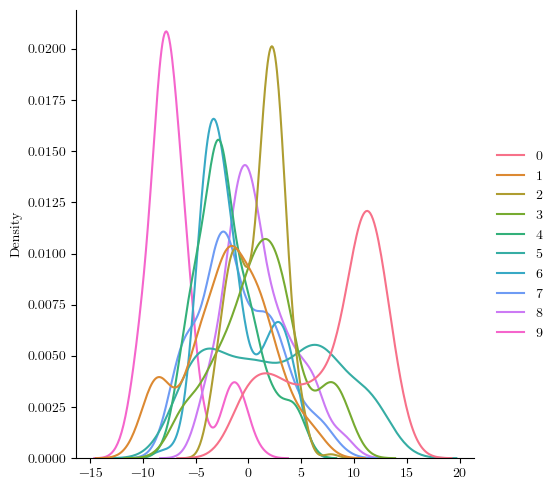

In [55]:

sns.displot(data[mask][:,3:13], kind="kde")

In [ ]:

sns.displot(data[mask][:,0:4], kind="kde")

In [81]:
from utils.evaluate import confusion_matrix 

In [111]:

g_unique = list(np.unique(group_id))
gid_int = [g_unique.index(g) for g in group_id]

gid_int = np.array(gid_int)
g_unique = np.array(g_unique)

In [100]:
unique = list(np.unique(sid))
sid_int = []
for val in sid:
    sid_int.append(unique.index(val))

sid_int = np.array(sid_int)

unique = [u.decode() for u in unique]

In [159]:
cm = confusion_matrix(data, sid_int)

<Axes: >

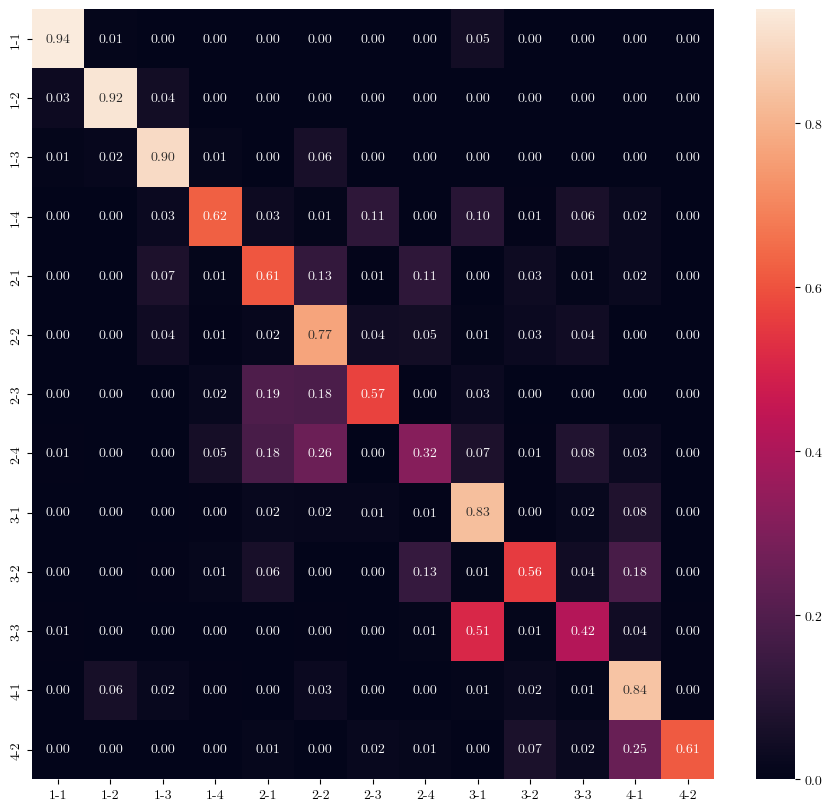

In [160]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplots(1, figsize=(11,10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=unique, yticklabels=unique)


In [119]:
unique

['1-1',
 '1-2',
 '1-3',
 '1-4',
 '2-1',
 '2-2',
 '2-3',
 '2-4',
 '3-1',
 '3-2',
 '3-3',
 '4-1',
 '4-2']

In [151]:
softmax(data,axis=-1 )

array([[9.9999475e-01, 5.8858734e-07, 4.6494151e-06, ..., 3.9346560e-12,
        4.2822794e-11, 2.9063443e-13],
       [9.9999976e-01, 2.0334452e-08, 2.5521823e-07, ..., 1.9008993e-13,
        1.1429786e-12, 3.1351698e-14],
       [9.9998212e-01, 2.6025481e-07, 1.7585824e-05, ..., 6.3027565e-12,
        6.7661828e-11, 5.0638053e-13],
       ...,
       [8.3809957e-04, 1.9093746e-05, 3.4543516e-06, ..., 2.2053329e-04,
        7.1549451e-01, 2.7304992e-01],
       [1.8945155e-03, 1.5559086e-05, 9.8459759e-07, ..., 1.2453676e-04,
        6.9896722e-01, 2.4930596e-01],
       [3.6685490e-03, 6.1106279e-05, 3.0733344e-07, ..., 2.4575329e-05,
        6.3176554e-01, 3.5702139e-01]], dtype=float32)

In [317]:
sm_data = softmax(data,axis=-1)

g_data = np.vstack(
    [
        np.mean(sm_data[:, 0:3], axis=-1),
        np.mean(sm_data[:, 3:7], axis=-1),
        np.mean(sm_data[:, 7:10], axis=-1),
        np.mean(sm_data[:, 10:12], axis=-1),
    ],
).transpose()


<Axes: >

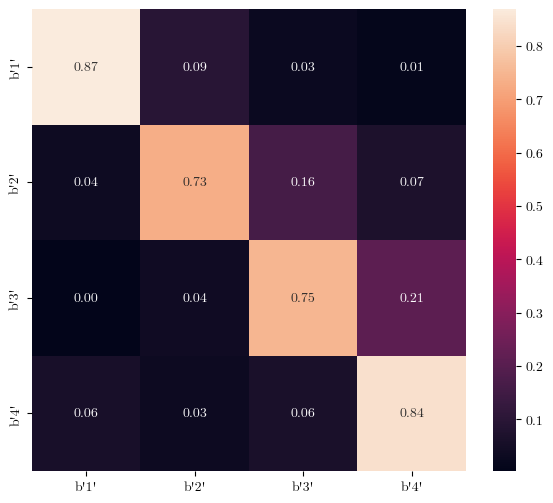

In [318]:

cm = confusion_matrix(g_data, gid_int)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplots(1, figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=g_unique, yticklabels=g_unique)



In [319]:
from sklearn.metrics import classification_report

In [320]:
np.mean(np.argmax((g_data), axis=-1) ==  gid_int)



0.8017541751772198

In [321]:
# softmax(g_data, axis=-1)


In [322]:
g_data

array([[3.33333343e-01, 1.02622716e-10, 7.68625996e-10, 2.33787243e-11],
       [3.33333343e-01, 7.24440820e-12, 2.28839950e-11, 6.66534265e-13],
       [3.33333313e-01, 1.56646551e-09, 5.30229416e-10, 3.69822922e-11],
       ...,
       [2.86882540e-04, 2.46266159e-03, 1.74595043e-04, 3.57857525e-01],
       [6.37019752e-04, 1.23057226e-02, 1.56117298e-04, 3.49545866e-01],
       [1.24332088e-03, 1.53428619e-03, 4.40464239e-04, 3.15895051e-01]],
      dtype=float32)

In [323]:
gid_int

array([0, 0, 0, ..., 3, 3, 3])

In [324]:
print(classification_report(gid_int, np.argmax(g_data, axis=-1), target_names=g_unique))

              precision    recall  f1-score   support

        b'1'       0.96      0.87      0.91      3184
        b'2'       0.74      0.73      0.73      1635
        b'3'       0.83      0.75      0.79      2654
        b'4'       0.51      0.84      0.63       850

    accuracy                           0.80      8323
   macro avg       0.76      0.80      0.77      8323
weighted avg       0.83      0.80      0.81      8323



In [325]:

print(classification_report(gid_int, np.argmax(g_data, axis=-1), target_names=g_unique))

              precision    recall  f1-score   support

        b'1'       0.96      0.87      0.91      3184
        b'2'       0.74      0.73      0.73      1635
        b'3'       0.83      0.75      0.79      2654
        b'4'       0.51      0.84      0.63       850

    accuracy                           0.80      8323
   macro avg       0.76      0.80      0.77      8323
weighted avg       0.83      0.80      0.81      8323



In [326]:
from utils.split_embeddings import Data

In [328]:
def average_data(data, group_id, names, n: int = 2):
    """
    A function that averages the data based on the given group_id and names.

    Args:
        data (numpy.ndarray): The input data array.
        group_id (numpy.ndarray): The group IDs for each data point.
        names (numpy.ndarray): The names for each data point.
        n (int, optional): The number of samples to average. Defaults to 2.

    Returns:
        Data: A Data object containing the averaged data.

    """
    new_names = []
    new_groups = []
    new_data = []

    for name in np.unique(names):
        mask = names == name
        masked_data = data[mask, :]
        modulo = (len(masked_data) % n)
        to_pad = n - modulo if modulo else 0
        masked_data = np.pad(masked_data, ((0,to_pad),(0,0)), 'constant', constant_values=np.nan)

        emb_len = masked_data.shape[1]

        split_data = np.reshape(masked_data, (-1,n,emb_len))
        new_d = np.nanmean(split_data,axis=1)

        s = len(new_d)

        new_data.append(new_d)
        new_names.extend([name] * s)
        new_groups.extend([group_id[mask][0]] * s)

    return Data(X=np.concatenate(new_data, axis=0), y=np.array(new_groups), ids=np.array(new_names))


In [329]:
res = average_data(softmax(data), group_id=group_id, names=name, n=2)

In [330]:
np.argmax(data, -1)


array([ 0,  0,  0, ..., 11, 11, 11])

In [331]:
acc = np.mean(np.argmax(data, axis=-1) == sid_int)

In [332]:
acc

0.7712363330529857

In [335]:
d = Data(X=data, y=sid_int, ids=name)
for i in range(20):

    acc = np.mean(np.argmax(d.X, axis=-1) == d.y)
    print(acc)

    d = average_data(
        d.X, 
        group_id=d.y,
        names=d.ids,
        n=2,
    )

0.7712363330529857
0.7759962273048809
0.7784322609877662
0.7875210792580101
0.7838235294117647
0.7775229357798165
0.8056338028169014
0.8090909090909091
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927
0.8079268292682927


array([b'535443_1965_01-Bela_pod_Bezdezem_MB_Brezinka',
       b'535443_1965_01-Bela_pod_Bezdezem_MB_Brezinka',
       b'535443_1965_01-Bela_pod_Bezdezem_MB_Brezinka', ...,
       b'599158_1965_03-Terlicko_KA_Hradiste',
       b'599158_1965_03-Terlicko_KA_Hradiste',
       b'599158_1965_03-Terlicko_KA_Hradiste'], dtype='|S44')